# An inferential problem: The Gender Wage Gap

As in the previous lab, we focus on what is the difference in predicted wages between men and women with the same job-relevant characteristics; but we only focus on the subset of college-educated workers.

To investigate the gender wage gap in this subset, we consider the following log-linear regression model

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 D  + \beta_2' W + \epsilon,
\end{align}

where $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the
$W$'s are controls explaining variation in wages. Please take into account that the variables used to restrict the database, *scl* and *clg*, are not part of the $W$'s controls anymore. Although this, we still used transformed wages by the logarithm in the estimation.

## Data analysis

We consider the same subsample of the U.S. Current Population Survey (2015) as in the previous lab. 

In [18]:
load("../data/wage2015_subsample_inference.Rdata")
## re-naming the data frame so we can use the prevoius name
data_raw <- data
## remove data frame 'df'
rm(data)

dim(data_raw)

[1] 5150   20

However, we only need a subset of the data. In order to select part of the data, we use the *scl* and *clg* variables.

In [19]:
data <-subset(data_raw, scl==1 | clg==1) # we named it like this to keep the notation

dim (data) # less observations (3068) than before
data

[1] 3068   20

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
10,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7.0,0.4900,0.343000,0.24010000,3600,11,8370,18
12,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31.0,9.6100,29.791000,92.35210000,3050,10,5070,9
19,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22.0,4.8400,10.648000,23.42560000,2015,6,9470,22
30,11.730769,2.462215,1,0,0,0,1,0,0,0,0,1,1.0,0.0100,0.001000,0.00010000,1650,5,7460,14
71,19.230769,2.956512,1,0,0,0,1,0,0,0,0,1,4.0,0.1600,0.064000,0.02560000,3255,10,8190,18
84,12.019231,2.486508,1,0,0,1,0,0,0,0,0,1,5.5,0.3025,0.166375,0.09150625,3600,11,8270,18
89,13.461538,2.599837,1,0,0,1,0,0,0,0,0,1,20.5,4.2025,8.615125,17.66100625,3645,11,8190,18
96,16.346154,2.793993,1,0,0,0,1,0,0,0,0,1,25.0,6.2500,15.625000,39.06250000,110,1,7870,17
119,8.653846,2.158004,0,0,0,1,0,0,0,0,0,1,3.5,0.1225,0.042875,0.01500625,7410,20,570,3
135,10.683761,2.368725,1,0,0,1,0,0,0,0,0,1,6.5,0.4225,0.274625,0.17850625,4300,15,8590,19


In [4]:
library(xtable)

Z <-data[which(colnames(data) %in% c("lwage","sex","shs","hsg","ad","ne","mw","so","we","exp1"))]
dim(Z) # we can see that the data set has 3068 observations and 10 variables

[1] 3068   10

Already dealt with this, and removing *scl* and *clg* from the data set, we start our causal analysis comparing the sample means given gender:

In [5]:
data_female <- data[data$sex==1,]
Z_female <- data_female[which(colnames(data) %in% c("lwage","sex","shs","hsg","ad","ne","mw","so","we","exp1"))]


data_male <- data[data$sex==0,]
Z_male <- data_male[which(colnames(data) %in% c("lwage","sex","shs","hsg","ad","ne","mw","so","we","exp1"))]

In [6]:
table <- matrix(0, 10, 3)
table[1:10,1]   <- as.numeric(lapply(Z,mean))
table[1:10,2]   <- as.numeric(lapply(Z_male,mean))
table[1:10,3]   <- as.numeric(lapply(Z_female,mean))
rownames(table) <- c("Log Wage","Sex","Less then High School","High School Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience")
colnames(table) <- c("All","Men","Women")
tab<- xtable(table, digits = 4)
tab

,All,Men,Women
Log Wage,3.0000223,3.0384121,2.9569035
Sex,0.4709909,0.0000000,1.0000000
Less then High School,0.0000000,0.0000000,0.0000000
High School Graduate,0.0000000,0.0000000,0.0000000
Advanced Degree,0.0000000,0.0000000,0.0000000
Northeast,0.2659713,0.2612446,0.2712803
Midwest,0.2858540,0.2908195,0.2802768
South,0.2216428,0.2285890,0.2138408
West,0.2265319,0.2193469,0.2346021
Experience,12.7009452,12.4331485,13.0017301


We can see that, obviously, other education dimensions are empty since we have limited the data base to people who have had some college education.

In [7]:
print(tab,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Sep 09 22:33:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> All </th> <th> Men </th> <th> Women </th>  </tr>
  <tr> <td align="right"> Log Wage </td> <td align="right"> 3.0000 </td> <td align="right"> 3.0384 </td> <td align="right"> 2.9569 </td> </tr>
  <tr> <td align="right"> Sex </td> <td align="right"> 0.4710 </td> <td align="right"> 0.0000 </td> <td align="right"> 1.0000 </td> </tr>
  <tr> <td align="right"> Less then High School </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> High School Graduate </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> Advanced Degree </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> Northeast </td> <td align="right"> 0.2660 </t

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Tue Sep 07 22:47:28 2021 -->
<table border=1>
<tr> <th>  </th> <th> All </th> <th> Men </th> <th> Women </th>  </tr>
  <tr> <td align="right"> Log Wage </td> <td align="right"> 3.0000 </td> <td align="right"> 3.0384 </td> <td align="right"> 2.9569 </td> </tr>
  <tr> <td align="right"> Sex </td> <td align="right"> 0.4710 </td> <td align="right"> 0.0000 </td> <td align="right"> 1.0000 </td> </tr>
  <tr> <td align="right"> Less then High School </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> High School Graduate </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> Advanced Degree </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> Northeast </td> <td align="right"> 0.2660 </td> <td align="right"> 0.2612 </td> <td align="right"> 0.2713 </td> </tr>
  <tr> <td align="right"> Midwest </td> <td align="right"> 0.2859 </td> <td align="right"> 0.2908 </td> <td align="right"> 0.2803 </td> </tr>
  <tr> <td align="right"> South </td> <td align="right"> 0.2216 </td> <td align="right"> 0.2286 </td> <td align="right"> 0.2138 </td> </tr>
  <tr> <td align="right"> West </td> <td align="right"> 0.2265 </td> <td align="right"> 0.2193 </td> <td align="right"> 0.2346 </td> </tr>
  <tr> <td align="right"> Experience </td> <td align="right"> 12.7009 </td> <td align="right"> 12.4331 </td> <td align="right"> 13.0017 </td> </tr>
   </table>
  

The table above shows that the difference in average *logwage* between men and women is equal to $0.0815$

In [8]:
mean(data_female$lwage)-mean(data_male$lwage)

[1] -0.08150856

This way, the unconditional gender wage gap is about $8,2$\% for the group of never married workers (women get paid less on average in our sample). In comparison to the general data base, the gender-gap is bigger by $4.35$%.

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an OLS regression

In [9]:
#estimate the old regression
library(sandwich)
nocontrol.fit <- lm(data$lwage ~ data$sex)
#extract the estimated coefficient when sex==1
nocontrol.est <- summary(nocontrol.fit)$coef["data$sex",1]

HCV.coefs <- vcovHC(nocontrol.fit, type = 'HC');
nocontrol.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

# print unconditional effect of gender and the corresponding standard error
cat ("The estimated gender coefficient is",nocontrol.est," and the corresponding robust standard error is",nocontrol.se) 

The estimated gender coefficient is -0.08150856  and the corresponding robust standard error is 0.01957965

Note that, as well as in the lab, the standard error is computed with the *R* package *sandwich* to be robust to heteroskedasticity. 


Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, region, and occupation and industry indicators plus transformations and two-way interactions. Note that we omitted the education controls because, as seen in the former table, the values of other variables related to this one ("shs","hsg","ad") have the value of $0$ for all the observations. 

Let us run the ols regression with controls.

In [74]:
flex <- lwage ~ sex + (exp1+exp2+exp3+exp4)*(occ2+ind2+mw+so+we)

#   Note that ()*() operation in formula objects in R creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (occ2+ind2+mw+so+we) +  (exp1+exp2+exp3+exp4)*(occ2+ind2+mw+so+we)
#  This is not intuitive at all, but that's what it does.

control.fit <- lm(flex, data=data)


In [66]:
control.est <- summary(control.fit)$coef[2,1]
control.pred <- summary(control.fit)$coef[,1]
summary(control.fit)


Call:
lm(formula = flex, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.81275 -0.28972  0.00273  0.26013  2.77632 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.786123   0.517713   7.313 3.38e-13 ***
sex         -0.057259   0.019804  -2.891 0.003867 ** 
exp1        -0.226595   0.200553  -1.130 0.258635    
exp2         4.417748   2.401820   1.839 0.065970 .  
exp3        -2.305965   1.029426  -2.240 0.025165 *  
exp4         0.348108   0.140088   2.485 0.013015 *  
occ22        0.200003   0.161875   1.236 0.216731    
occ23       -0.018309   0.214389  -0.085 0.931947    
occ24       -0.005795   0.235391  -0.025 0.980362    
occ25       -0.326079   0.403527  -0.808 0.419118    
occ26       -0.220637   0.276441  -0.798 0.424860    
occ27       -0.139378   0.428702  -0.325 0.745117    
occ28       -0.212106   0.278037  -0.763 0.445604    
occ29       -0.412462   0.209811  -1.966 0.04

In [55]:
cat("Coefficient for OLS with controls", control.est)

HCV.coefs <- vcovHC(control.fit, type = 'HC');
control.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

Coefficient for OLS with controls -0.05725889

The estimated regression coefficient $\beta_1\approx-0.05$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed, and it is the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. We can see that the unconditional wage gap of size $8$\% for women decreases to about $6$\% after controlling for worker characteristics of the subset of college-educated workers.

Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

In [73]:
# Partialling-Out using ols

# models
flex.y <- lwage ~  (exp1+exp2+exp3+exp4)*(occ2+ind2+mw+so+we) # model for Y
flex.d <- sex ~ (exp1+exp2+exp3+exp4)*(occ2+ind2+mw+so+we) # model for D

# partialling-out the linear effect of W from Y
t.Y <- lm(flex.y, data=data)$res


In [67]:
# partialling-out the linear effect of W from D
t.D <- lm(flex.d, data=data)$res

# regression of Y on D after partialling-out the effect of W
partial.fit <- lm(t.Y~t.D)
partial.est <- summary(partial.fit)$coef[2,1]

In [11]:
# Partialling-Out using ols

# models
flex.y <- lwage ~  (exp1+exp2+exp3+exp4)*(occ2+ind2+mw+so+we) # model for Y
flex.d <- sex ~ (exp1+exp2+exp3+exp4)*(occ2+ind2+mw+so+we) # model for D

# partialling-out the linear effect of W from Y
t.Y <- lm(flex.y, data=data)$res
# partialling-out the linear effect of W from D
t.D <- lm(flex.d, data=data)$res

# regression of Y on D after partialling-out the effect of W
partial.fit <- lm(t.Y~t.D)
partial.est <- summary(partial.fit)$coef[2,1]
part.est

cat("Coefficient for D via partialling-out", partial.est)

# standard error
HCV.coefs <- vcovHC(partial.fit, type = 'HC')
partial.se <- sqrt(diag(HCV.coefs))[2]

# confidence interval
confint(partial.fit)[2,]

Coefficient for D via partialling-out -0.05725889

2.5 %      97.5 % 
-0.09465139 -0.01986640

Again, the estimated coefficient measures the linear predictive effect (PE) of $D$ on $Y$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

We know that the partialling-out approach works well when the dimension of $W$ is low
in relation to the sample size $n$. When the dimension of $W$ is relatively high, we need to use variable selection
or penalization for regularization purposes. 


In [44]:
head(data)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
10,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7.0,0.4900,0.343000,0.24010000,3600,11,8370,18
12,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31.0,9.6100,29.791000,92.35210000,3050,10,5070,9
19,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22.0,4.8400,10.648000,23.42560000,2015,6,9470,22
30,11.730769,2.462215,1,0,0,0,1,0,0,0,0,1,1.0,0.0100,0.001000,0.00010000,1650,5,7460,14
71,19.230769,2.956512,1,0,0,0,1,0,0,0,0,1,4.0,0.1600,0.064000,0.02560000,3255,10,8190,18
84,12.019231,2.486508,1,0,0,1,0,0,0,0,0,1,5.5,0.3025,0.166375,0.09150625,3600,11,8270,18


In [69]:
graph <- data["lwage"]
graph$exp1 <- data$exp1
head(graph)

,lwage,exp1
10,2.263364,7.0
12,3.872802,31.0
19,3.361977,22.0
30,2.462215,1.0
71,2.956512,4.0
84,2.486508,5.5


## Graphic

In [22]:
library(ggplot2)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


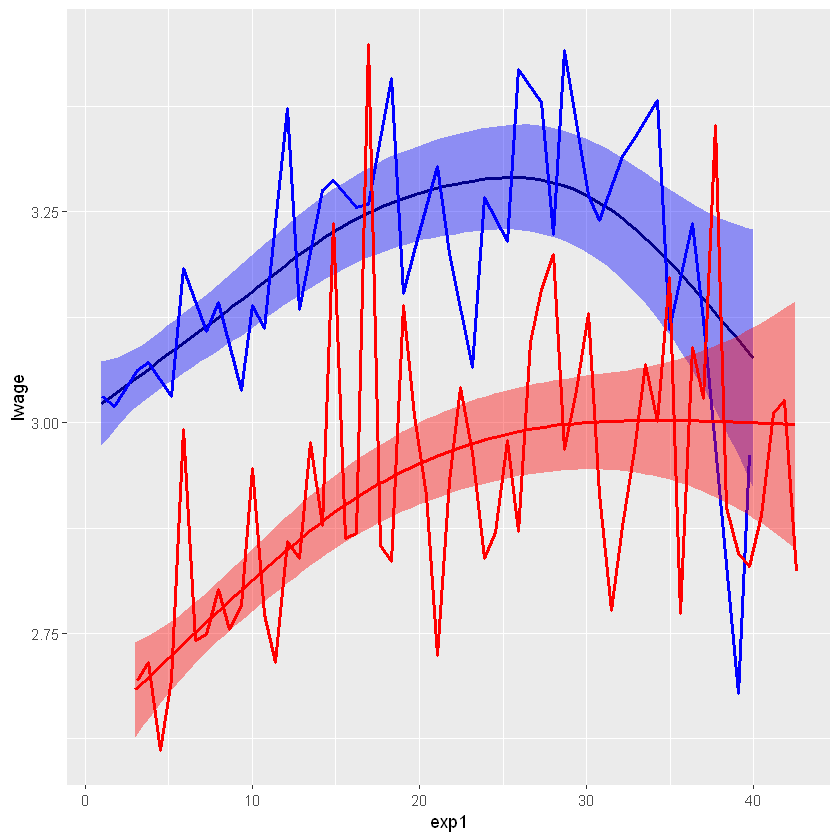

In [23]:
somcol = data[data$scl==1,]
col = data[data$clg==1,]
ggplot(NULL,aes(exp1,lwage)) +geom_smooth( data=col,  fill="blue",colour="darkblue", size=1)+ stat_summary_bin(data=col, fun='mean', bins=60,color='blue', size=1, geom='line')+geom_smooth( data=somcol, fill="red",colour="red", size=1)+ stat_summary_bin(data=somcol, fun='mean', bins=60,color='red', size=1, geom='line')

# The proof of the Frisch-Waugh-Lovell Theorem

We can start defining the main equation as:

\begin{align} 
Y= D \beta_1 + W \beta_2 + e
\end{align}

Since we want to find $\beta_1$, we can use the **F-W-L Theorem** to proof that we can find it by partialling-out. For that, first, we need to start by regressing $Y$ with $W$ and $D$ with $W$:

 \begin{align} 
Y=\alpha_{YW} W+ e_1 \\
D=\alpha_{DW} W+ e_2 \\
\end{align}

With this, we can estimate the residual errors $\hat{e_1}$ and $\hat{e_2}$ after estimating the coefficients $\hat{\alpha_{YW}}$  and $\hat{\alpha_{DW}}$ using OLS. We can present them using the *waste generation matrix*:

\begin{align} 
\hat{e_1}&= Y- W \hat{\alpha_{YW}} \\
&= Y- W (W'W)^{-1} W' Y\\
&= (I-W (W'W)^{-1} W')Y\\
&=MY
\end{align}

\begin{align} 
\hat{e_2}&= D- W \hat{\alpha_{DW}} \\
&= D- W (W'W)^{-1} W' D\\
&= (I-W (W'W)^{-1} W')D\\
&=MD
\end{align}

An interesting property of this waste generation matrix is that is *idempotent* meaning it follows:

\begin{align} 
M M &=  (I-W (W'W)^{-1} W')  (I-W (W'W)^{-1} W') \\
&= I - W (W'W)^{-1} W' - W (W'W)^{-1} W' +  W (W'W)^{-1} W' W (W'W)^{-1} W'\\
&= I - 2 W (W'W)^{-1} W' +  W (W'W)^{-1} W' \\
&= I - W (W'W)^{-1} W' \\
&= M
\end{align}

With this in mind, we can regress $\hat{e_1}$ and $\hat{e_2}$ using OLS:

\begin{align} 
\hat{e_1}=\hat{e_2}+\alpha_{e_1 e_2} + e_3
\end{align}

And find that $\hat{\alpha_{e_1 e_2}}$= $\beta_1$, proving the **F-W-L Theorem**:

\begin{align} 
\hat{\alpha_{e_1 e_2}}&=(\hat{e_2}' \hat{e_2}) ^{-1} (\hat{e_2}'\hat{e_1}) \\
&= ( ( MD)' MD )^{-1} ( (MD)' MY) \\
&= (D'M'M D ) ^{-1} (D'M'M Y) \\
&= (D'D)^{-1} (D'Y) \\
&= \beta_1
\end{align}